# Import needed modules

In [24]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  

In [1]:
# import system libs 
import os
import time
import glob
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# Data Preprocessing

#### Read data and store it in dataframe

In [2]:
data_dir = '/kaggle/input/instant-round-27-competition1/SeaLife/train'

filepaths = glob.glob(os.path.join(data_dir, '*', '*'))
labels = [os.path.basename(os.path.dirname(fp)) for fp in filepaths]

train_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [3]:
train_df

,filepaths,labels
0,/kaggle/input/instant-round-27-competition1/Se...,parrot
1,/kaggle/input/instant-round-27-competition1/Se...,parrot
2,/kaggle/input/instant-round-27-competition1/Se...,parrot
3,/kaggle/input/instant-round-27-competition1/Se...,parrot
4,/kaggle/input/instant-round-27-competition1/Se...,parrot
...,...,...
344,/kaggle/input/instant-round-27-competition1/Se...,surgeon
345,/kaggle/input/instant-round-27-competition1/Se...,surgeon
346,/kaggle/input/instant-round-27-competition1/Se...,surgeon
347,/kaggle/input/instant-round-27-competition1/Se...,surgeon


In [4]:
data_dir = '/kaggle/input/instant-round-27-competition1/SeaLife/test'

test_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [5]:
test_df

,filepaths,labels
0,/kaggle/input/instant-round-27-competition1/Se...,parrot
1,/kaggle/input/instant-round-27-competition1/Se...,parrot
2,/kaggle/input/instant-round-27-competition1/Se...,parrot
3,/kaggle/input/instant-round-27-competition1/Se...,parrot
4,/kaggle/input/instant-round-27-competition1/Se...,parrot
...,...,...
344,/kaggle/input/instant-round-27-competition1/Se...,surgeon
345,/kaggle/input/instant-round-27-competition1/Se...,surgeon
346,/kaggle/input/instant-round-27-competition1/Se...,surgeon
347,/kaggle/input/instant-round-27-competition1/Se...,surgeon


In [6]:
data_dir = '/kaggle/input/instant-round-27-competition1/SeaLife/valid'

filepaths = glob.glob(os.path.join(data_dir, '*', '*'))
labels = [os.path.basename(os.path.dirname(fp)) for fp in filepaths]

valid_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [7]:
valid_df

,filepaths,labels
0,/kaggle/input/instant-round-27-competition1/Se...,parrot
1,/kaggle/input/instant-round-27-competition1/Se...,parrot
2,/kaggle/input/instant-round-27-competition1/Se...,parrot
3,/kaggle/input/instant-round-27-competition1/Se...,parrot
4,/kaggle/input/instant-round-27-competition1/Se...,parrot
...,...,...
130,/kaggle/input/instant-round-27-competition1/Se...,surgeon
131,/kaggle/input/instant-round-27-competition1/Se...,surgeon
132,/kaggle/input/instant-round-27-competition1/Se...,surgeon
133,/kaggle/input/instant-round-27-competition1/Se...,surgeon


#### Create image data generator

In [8]:
# Define image size and channels
img_size = (224, 224)
channels = 3
img_shape = (*img_size, channels)

# ImageDataGenerator for training and testing
data_gen_params = dict(target_size=img_size, class_mode='categorical', color_mode='rgb', batch_size=128)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

# Flow from DataFrame for training, validation, and testing
train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', shuffle=True, **data_gen_params)
valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', shuffle=True, **data_gen_params)
test_gen = ts_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', shuffle=False, **data_gen_params)


Found 349 validated image filenames belonging to 7 classes.
Found 135 validated image filenames belonging to 7 classes.
Found 349 validated image filenames belonging to 7 classes.


#### Show sample from train data

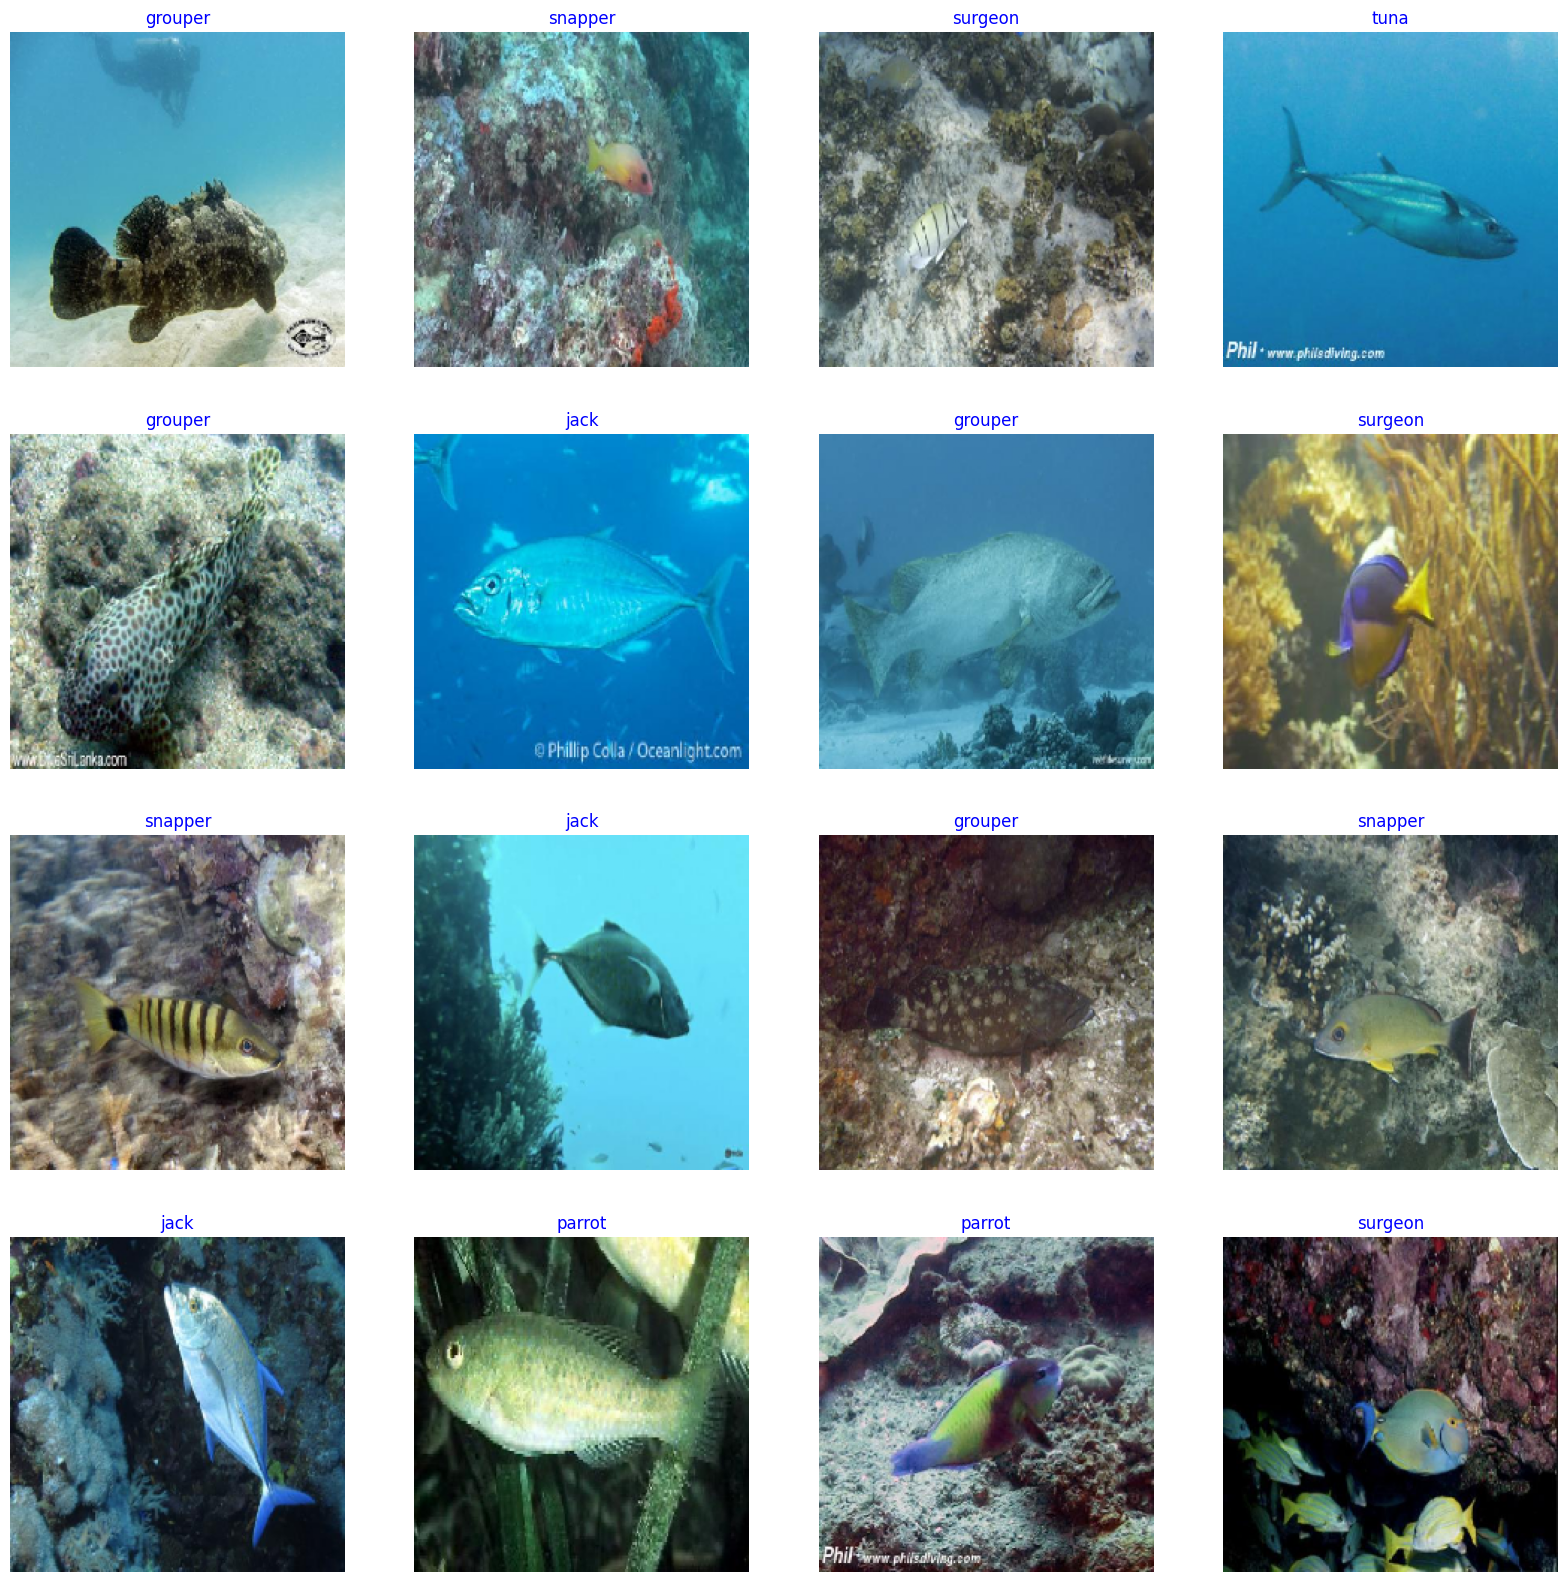

In [9]:
# Get class indices and names
class_indices = train_gen.class_indices
class_names = list(class_indices.keys())

# Get a batch of samples from the generator
images, labels = next(train_gen)

# Plot the images
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    # Normalize the image to the range [0, 1]
    image = images[i] / 255
    
    plt.imshow(image)
    
    # Get the index and class name for the label
    index = np.argmax(labels[i])
    class_name = class_names[index]
    
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')

plt.show()

# Model Structure

#### Generic Model Creation

In [10]:
# Define model parameters
img_size = (224, 224)
channels = 3
img_shape = (*img_size, channels)
class_count = len(train_gen.class_indices)   # to define number of classes in dense layer

# Create pre-trained model (EfficientNetB5)
base_model = tf.keras.applications.EfficientNetB5(
    include_top=False, weights="imagenet", input_shape=img_shape, pooling='max'
)
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer = regularizers.l2(0.016), activity_regularizer = regularizers.l1(0.006),
          bias_regularizer = regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


115263384/115263384 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 2048)             28513527  
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 29,048,062
Trainable params: 530,439
Non-

#### Train model

In [24]:
epochs = 20   # number of epochs for training

# Training the model
history = model.fit(
    x=train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    shuffle=False
)

Epoch 1/20
3/3 [==============================] - 103s 38s/step - loss: 8.0504 - accuracy: 0.8338 - val_loss: 10.2539 - val_accuracy: 0.6593
Epoch 2/20
3/3 [==============================] - 116s 44s/step - loss: 7.9188 - accuracy: 0.8367 - val_loss: 9.9857 - val_accuracy: 0.6667
Epoch 3/20
3/3 [==============================] - 103s 37s/step - loss: 7.6233 - accuracy: 0.9112 - val_loss: 9.6391 - val_accuracy: 0.6963
Epoch 4/20
3/3 [==============================] - 104s 38s/step - loss: 7.5219 - accuracy: 0.8940 - val_loss: 9.2648 - val_accuracy: 0.7111
Epoch 5/20
3/3 [==============================] - 115s 44s/step - loss: 7.3632 - accuracy: 0.9083 - val_loss: 8.8507 - val_accuracy: 0.7111
Epoch 6/20
3/3 [==============================] - 115s 44s/step - loss: 7.1564 - accuracy: 0.9542 - val_loss: 8.4879 - val_accuracy: 0.7481
Epoch 7/20
3/3 [==============================] - 118s 45s/step - loss: 7.0490 - accuracy: 0.9398 - val_loss: 8.2008 - val_accuracy: 0.7259
Epoch 8/20
3/3 [===

In [13]:
# Fine-Tuning:

# Unfreeze some layers for fine-tuning
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after unfreezing some layers
model.compile(
    optimizer=Adamax(learning_rate=0.0001),  # Adjust the learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set the number of fine-tuning epochs
epochs_fine_tune = 15

# Train the model with fine-tuned layers
history_fine_tune = model.fit(
    x=train_gen,
    epochs=epochs_fine_tune,
    verbose=1,
    validation_data=test_gen,
    shuffle=False
)


Epoch 1/15
3/3 [==============================] - 254s 67s/step - loss: 7.5004 - accuracy: 0.4413 - val_loss: 6.8016 - val_accuracy: 0.6963
Epoch 2/15
3/3 [==============================] - 217s 76s/step - loss: 7.0712 - accuracy: 0.6103 - val_loss: 6.7536 - val_accuracy: 0.7111
Epoch 3/15
3/3 [==============================] - 223s 79s/step - loss: 6.7124 - accuracy: 0.7479 - val_loss: 6.7227 - val_accuracy: 0.7259
Epoch 4/15
3/3 [==============================] - 212s 74s/step - loss: 6.5214 - accuracy: 0.8052 - val_loss: 6.7007 - val_accuracy: 0.7407
Epoch 5/15
3/3 [==============================] - 195s 65s/step - loss: 6.3969 - accuracy: 0.8252 - val_loss: 6.6829 - val_accuracy: 0.7481
Epoch 6/15
3/3 [==============================] - 201s 65s/step - loss: 6.2601 - accuracy: 0.8911 - val_loss: 6.6640 - val_accuracy: 0.7481
Epoch 7/15
3/3 [==============================] - 193s 65s/step - loss: 6.1973 - accuracy: 0.9169 - val_loss: 6.6462 - val_accuracy: 0.7556
Epoch 8/15
3/3 [====

#### Display model performance

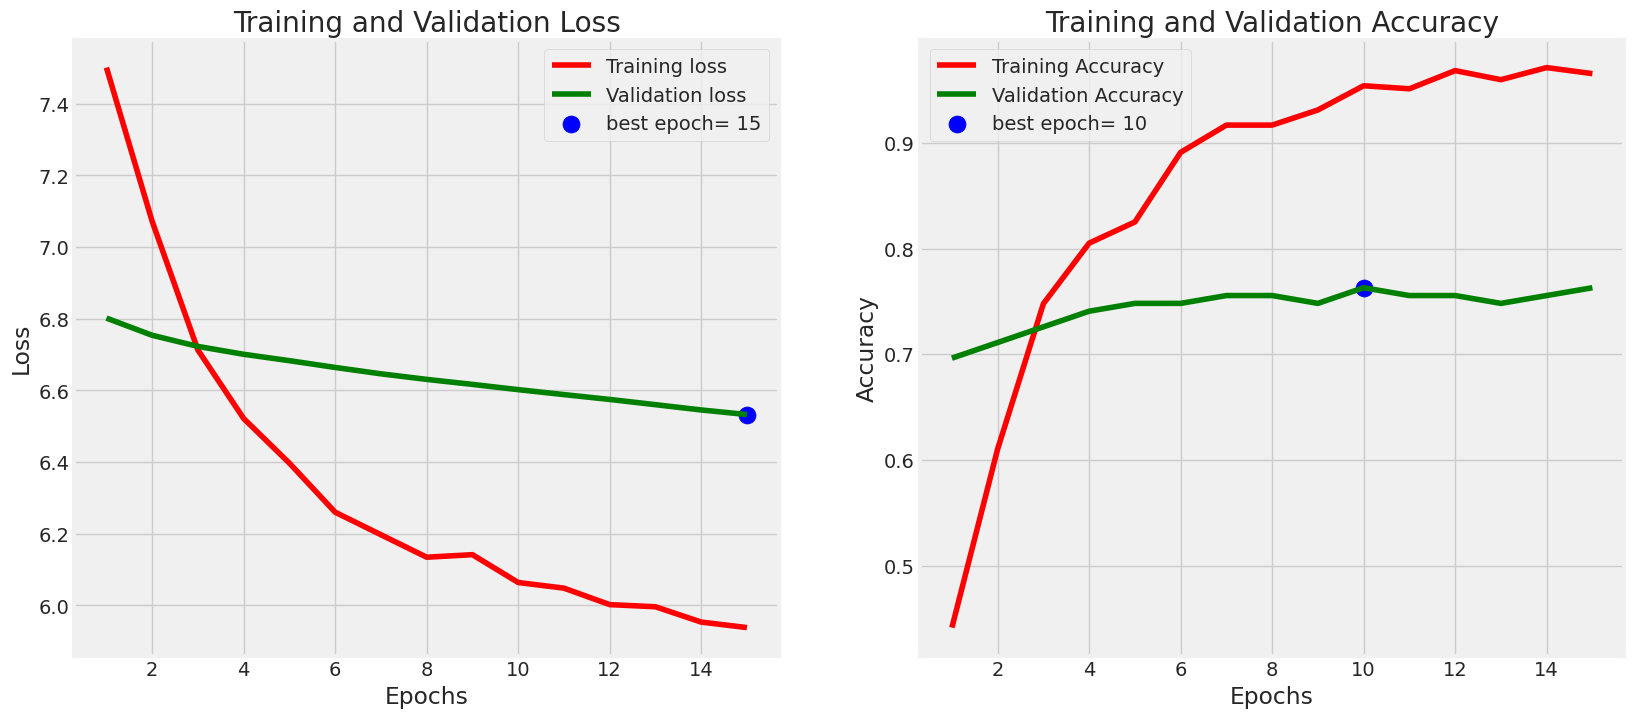

In [20]:
# Define needed variables
tr_acc = history_fine_tune.history['accuracy']
tr_loss = history_fine_tune.history['loss']
val_acc = history_fine_tune.history['val_accuracy']
val_loss = history_fine_tune.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate model

In [23]:
# Calculate test batch size and steps
ts_length = len(test_df)
test_batch_size_candidates = [n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]
test_batch_size = max(test_batch_size_candidates)
test_steps = ts_length // test_batch_size

# Evaluate the model on training, validation, and test sets
train_score = model.evaluate(train_gen, steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Display evaluation results
print(f"Train Loss: {train_score[0]}, Train Accuracy: {train_score[1]}")
print('-' * 40)
print(f"Valid Loss: {valid_score[0]}, Valid Accuracy: {valid_score[1]}")
print('-' * 40)
print(f"Test Loss: {test_score[0]}, Test Accuracy: {test_score[1]}")


1/1 [==============================] - 21s 21s/step - loss: 5.9274 - accuracy: 0.9766
Train Loss: 5.997229099273682, Train Accuracy: 0.953125
----------------------------------------
Valid Loss: 6.552521705627441, Valid Accuracy: 0.7578125
----------------------------------------
Test Loss: 5.927364349365234, Test Accuracy: 0.9765625


# Get Predictions

In [15]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

#### Confusion Matrics and Classification Report

3/3 [==============================] - 61s 19s/step


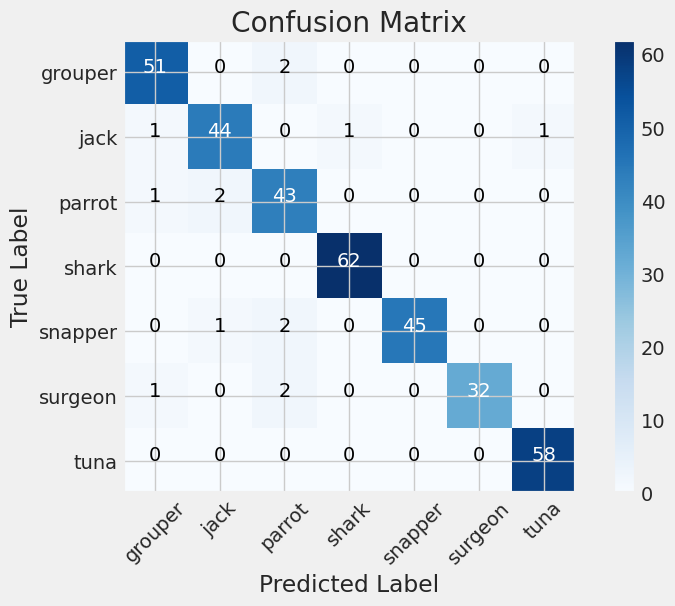

In [34]:
# Get class indices and names
class_indices = test_gen.class_indices
classes = list(class_indices.keys())

# Calculate confusion matrix
y_true = test_gen.classes
y_pred = model.predict(test_gen).argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.

# Display values inside the cells
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [18]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

     grouper       0.94      0.96      0.95        53
        jack       0.94      0.94      0.94        47
      parrot       0.88      0.93      0.91        46
       shark       0.98      1.00      0.99        62
     snapper       1.00      0.94      0.97        48
     surgeon       1.00      0.91      0.96        35
        tuna       0.98      1.00      0.99        58

    accuracy                           0.96       349
   macro avg       0.96      0.96      0.96       349
weighted avg       0.96      0.96      0.96       349

